# Entrega 1

Importar as bibliotecas necessárias:

In [ ]:
# Importar as bibliotecas necessárias
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import datetime
import scipy.stats as stats

# Configurar os gráficos para serem exibidos no notebook
%matplotlib inline


Conexão com a API:

In [8]:
# Definir uma função para obter os dados da API e processá-los
def obter_dados(ramo, simbolo, data_inicio, data_final):
    """
    Faz uma requisição à API e retorna um DataFrame com os dados processados.
    
    Parâmetros:
        ramo (str): O ramo de atuação.
        simbolo (str): O símbolo da empresa.
        data_inicio (str): Data de início no formato dd.mm.yyyy.
        data_final (str): Data final no formato dd.mm.yyyy.
        
    Retorna:
        df (DataFrame): DataFrame com as colunas 'Data' e 'Fechamento' processadas.
    """
    # Montar a URL da API
    url = 'http://localhost:3000/query'
    params = {
        'ramo': ramo,
        'simbolo': simbolo,
        'data_inicio': data_inicio,
        'data_final': data_final
    }
    
    # Fazer a requisição GET
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f'Erro na requisição: {response.status_code}')
        return None
    
    # Converter a resposta em JSON
    data = response.json()
    
    # Converter para DataFrame
    df = pd.DataFrame(data)
    
    # Converter a coluna 'Data' para datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
    
    # Converter a coluna 'Fechamento' para float
    df['Fechamento'] = df['Fechamento'].astype(float)
    
    # Ordenar o DataFrame por data
    df = df.sort_values('Data').reset_index(drop=True)
    
    return df


Requisição de dados e armazenamento deles:

# Entrega 2

Mostrar a equação de regressão e calcular o R^2

Gráfico de dispersão com a linha de tendência:

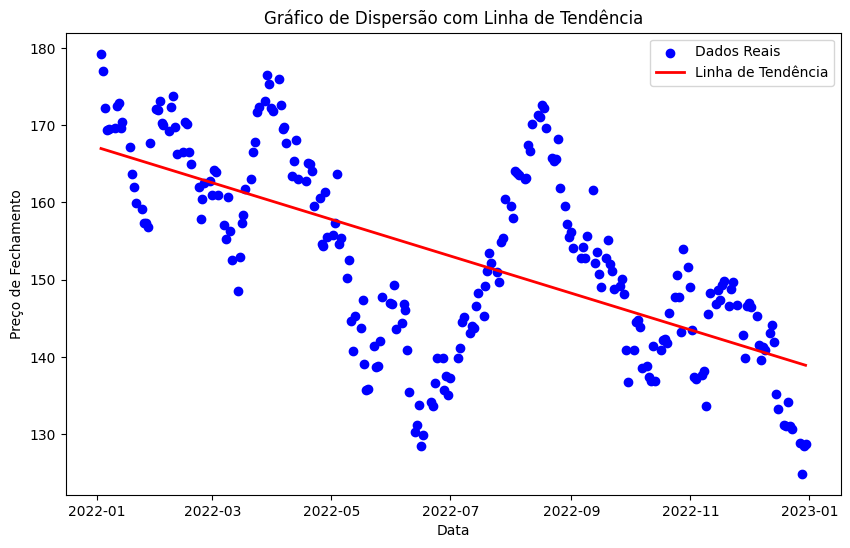

In [13]:
# Gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(df['Data'], df['Fechamento'], color='blue', label='Dados Reais')

# Prever os valores usando o modelo
y_pred = modelo.predict(X)

# Plotar a linha de tendência
plt.plot(df['Data'], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Configurações do gráfico
plt.title('Gráfico de Dispersão com Linha de Tendência')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


# Entrega 3

In [14]:
# Definir o nível de confiança
nivel_confianca = 0.95  # 95% de confiança

# Número de observações
n = len(df)

# Média amostral
media_amostral = df['Fechamento'].mean()

# Desvio padrão amostral
desvio_padrao_amostral = df['Fechamento'].std(ddof=1)

# Erro padrão
erro_padrao = desvio_padrao_amostral / np.sqrt(n)

# Valor crítico (z) para o nível de confiança
z_critico = stats.norm.ppf(1 - (1 - nivel_confianca) / 2)

# Margem de erro (Epsilon)
epsilon = z_critico * erro_padrao

# Intervalo de confiança
limite_inferior = media_amostral - epsilon
limite_superior = media_amostral + epsilon

# Erro usando a largura do intervalo
erro_intervalo = limite_superior - limite_inferior

# Exibir os resultados
print(f"Nível de Confiança: {nivel_confianca * 100}%")
print(f"Média Amostral: {media_amostral:.2f}")
print(f"Desvio Padrão Amostral: {desvio_padrao_amostral:.2f}")
print(f"Erro Padrão: {erro_padrao:.4f}")
print(f"Valor Crítico (z): {z_critico:.4f}")
print(f"Margem de Erro (Epsilon): {epsilon:.4f}")
print(f"Intervalo de Confiança: [{limite_inferior:.2f}, {limite_superior:.2f}]")
print(f"Erro usando a largura do intervalo: {erro_intervalo:.4f}")

Nível de Confiança: 95.0%
Média Amostral: 152.94
Desvio Padrão Amostral: 12.73
Erro Padrão: 0.8032
Valor Crítico (z): 1.9600
Margem de Erro (Epsilon): 1.5743
Intervalo de Confiança: [151.37, 154.52]
Erro usando a largura do intervalo: 3.1486


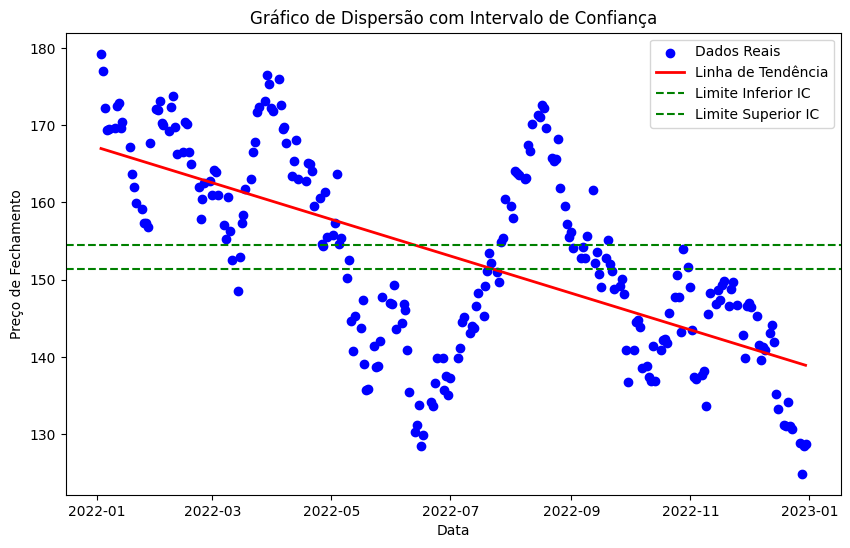

In [15]:
# Visualização do intervalo de confiança no gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Data'], df['Fechamento'], color='blue', label='Dados Reais')

# Linha de tendência
plt.plot(df['Data'], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Linhas horizontais do intervalo de confiança
plt.axhline(limite_inferior, color='green', linestyle='--', label='Limite Inferior IC')
plt.axhline(limite_superior, color='green', linestyle='--', label='Limite Superior IC')

# Configurações do gráfico
plt.title('Gráfico de Dispersão com Intervalo de Confiança')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


In [16]:
# Criar uma nova coluna para indicar se o fechamento aumentou em relação ao dia anterior
df['Aumento'] = df['Fechamento'].diff().fillna(0)
df['Sucesso'] = df['Aumento'] > 0

# Calcular a proporção amostral (p̂)
numero_sucessos = df['Sucesso'].sum()
proporcao_amostral = numero_sucessos / n

# Definir a hipótese nula e alternativa
# H0: A proporção populacional é p0 (por exemplo, 50%)
# H1: A proporção populacional é diferente de p0
p0 = 0.5  # Proporção esperada sob a hipótese nula
nivel_significancia = 0.05  # 5%

# Calcular o erro padrão da proporção
erro_padrao_proporcao = np.sqrt((p0 * (1 - p0)) / n)

# Calcular a estatística z
z_estatistica = (proporcao_amostral - p0) / erro_padrao_proporcao

# Calcular o valor-p para um teste bilateral
valor_p = 2 * (1 - stats.norm.cdf(abs(z_estatistica)))

# Comparar o valor-p com o nível de significância
rejeitar_H0 = valor_p < nivel_significancia

# Exibir os resultados
print(f"Número de Observações (n): {n}")
print(f"Número de Sucessos: {numero_sucessos}")
print(f"Proporção Amostral (p̂): {proporcao_amostral:.4f}")
print(f"Erro Padrão da Proporção: {erro_padrao_proporcao:.4f}")
print(f"Estatística z: {z_estatistica:.4f}")
print(f"Valor-p: {valor_p:.4f}")
print(f"Nível de Significância: {nivel_significancia}")
if rejeitar_H0:
    print("Conclusão: Rejeitamos a hipótese nula (H0).")
else:
    print("Conclusão: Não rejeitamos a hipótese nula (H0).")


Número de Observações (n): 251
Número de Sucessos: 117
Proporção Amostral (p̂): 0.4661
Erro Padrão da Proporção: 0.0316
Estatística z: -1.0730
Valor-p: 0.2833
Nível de Significância: 0.05
Conclusão: Não rejeitamos a hipótese nula (H0).


Variações acima de 0%: 46.61%
Variações abaixo de 0%: 52.59%
Variações iguais a 0%: 0.80%


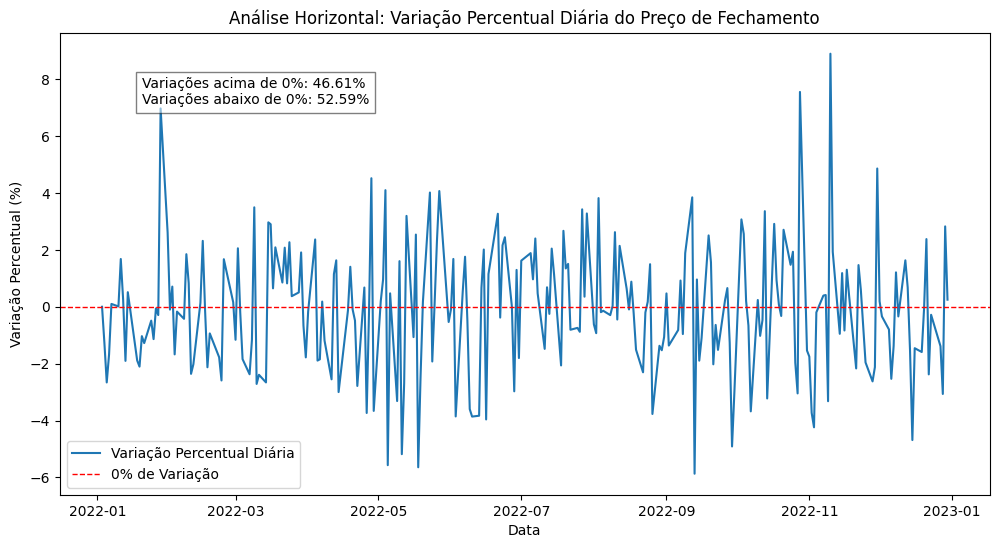

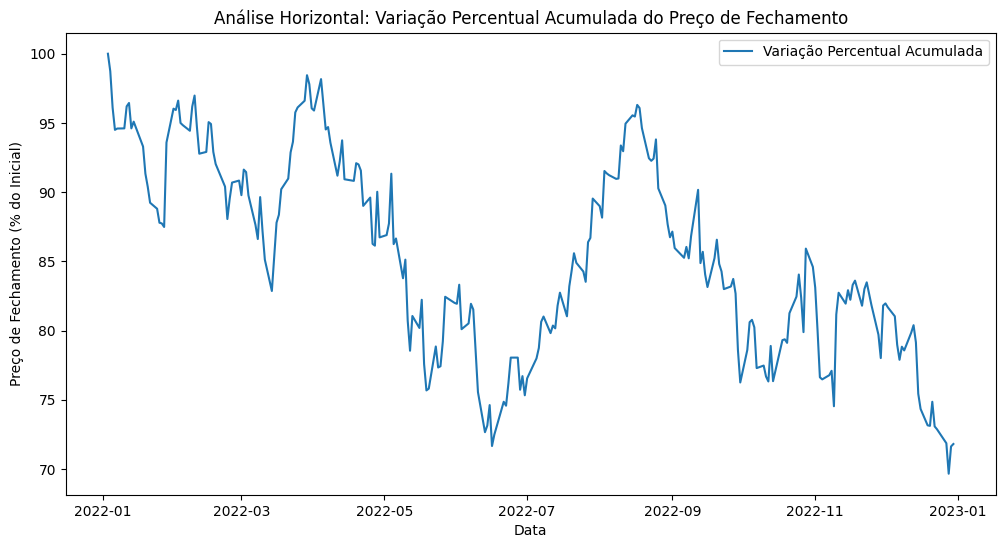

In [22]:
# Calcular a variação percentual nos preços de fechamento
df['Variacao_Percentual'] = df['Fechamento'].pct_change() * 100  # Multiplicar por 100 para obter a porcentagem

# Opcionalmente, preencher valores NaN com 0
df['Variacao_Percentual'] = df['Variacao_Percentual'].fillna(0)

# Calcular o número total de variações
total_variacoes = len(df)

# Calcular quantas variações estão acima e abaixo de 0%
variacoes_acima_zero = df[df['Variacao_Percentual'] > 0].shape[0]
variacoes_abaixo_zero = df[df['Variacao_Percentual'] < 0].shape[0]
variacoes_zero = df[df['Variacao_Percentual'] == 0].shape[0]

# Calcular os percentuais
percentual_acima_zero = (variacoes_acima_zero / total_variacoes) * 100
percentual_abaixo_zero = (variacoes_abaixo_zero / total_variacoes) * 100
percentual_zero = (variacoes_zero / total_variacoes) * 100

print(f"Variações acima de 0%: {percentual_acima_zero:.2f}%")
print(f"Variações abaixo de 0%: {percentual_abaixo_zero:.2f}%")
print(f"Variações iguais a 0%: {percentual_zero:.2f}%")

# Plotar as variações percentuais ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Variacao_Percentual'], label='Variação Percentual Diária')

# Adicionar a linha horizontal em 0%
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='0% de Variação')

# Adicionar texto com os percentuais no gráfico
texto = f'Variações acima de 0%: {percentual_acima_zero:.2f}%\nVariações abaixo de 0%: {percentual_abaixo_zero:.2f}%'
plt.text(df['Data'].iloc[int(len(df)*0.05)], df['Variacao_Percentual'].max()*0.8, texto,
         bbox=dict(facecolor='white', alpha=0.5))

plt.title('Análise Horizontal: Variação Percentual Diária do Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.show()


# Calcular a variação percentual acumulada a partir do primeiro preço de fechamento
df['Variacao_Acumulada'] = (df['Fechamento'] / df['Fechamento'].iloc[0]) * 100

# Plotar a variação percentual acumulada ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Variacao_Acumulada'], label='Variação Percentual Acumulada')
plt.title('Análise Horizontal: Variação Percentual Acumulada do Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (% do Inicial)')
plt.legend()
plt.show()

